# MA3506 - Coursework - Initial notebook

This notebook contains materials to help you to start your coursework. Carefuly read the provided comments, and study the provided pieces of code to understand the operations they perform. 

In [2]:
import numpy as  np
import matplotlib.pyplot as plt
import pandas as pd

## 1. One-dimensional example

In this first section, we assume that $\mathscr{X}=\mathbb{R}$. 


In the cell below, we encode a Gaussian (i.e. squared-exponential) kernel $K:\mathbb{R}\times\mathbb{R}\to\mathbb{R}$.  

In [3]:
ell_param = 1
rho_param = 1/(ell_param**2)

def Gauss_Kernel_1d(x,y):
    sq_dist = (x-y)**2
    return np.exp(-rho_param * sq_dist)

### 1.1 Sample path and conditioning

We next simulate the sample paths (i.e. realisations), on the interval $[0,10]$, of a centred GP with covaraince kernel $K$. To do so, we first need to discretise the interval $[0,10]$, i.e. we consider $M\in\mathbb{N}$ points in this interval. 

In [4]:
# Discretisation of the interval [0,10]
nPt = 501
Grid = np.linspace(0, 10, nPt)

We next build the covariance matrix corresponding to our discretisation.

In [5]:
# Remark: since for loops are extremly slow in R or Python,
# this is a very time-inefficient way to build kernel matrices

MatK_Grid = np.zeros((nPt, nPt))

for i in range(nPt):
    for j in range(i+1):
        MatK_Grid[i,j] = Gauss_Kernel_1d(Grid[i], Grid[j])
        MatK_Grid[j,i] = MatK_Grid[i,j]
       
    
print(MatK_Grid)
# We could save time by only filling the upper part of MatKGrid
# and next duplicating it    
#for i in range(nPt):
#    for j in range(i+1):
#        MatK_Grid[i,j] = Gauss_Kernel_1d(Grid[i], Grid[j])
#        MatK_Grid[j,i] = MatK_Grid[i,j]    

[[1.00000000e+00 9.99600080e-01 9.98401279e-01 ... 8.26594524e-44
  5.54748178e-44 3.72007598e-44]
 [9.99600080e-01 1.00000000e+00 9.99600080e-01 ... 1.23067032e-43
  8.26594524e-44 5.54748178e-44]
 [9.98401279e-01 9.99600080e-01 1.00000000e+00 ... 1.83081093e-43
  1.23067032e-43 8.26594524e-44]
 ...
 [8.26594524e-44 1.23067032e-43 1.83081093e-43 ... 1.00000000e+00
  9.99600080e-01 9.98401279e-01]
 [5.54748178e-44 8.26594524e-44 1.23067032e-43 ... 9.99600080e-01
  1.00000000e+00 9.99600080e-01]
 [3.72007598e-44 5.54748178e-44 8.26594524e-44 ... 9.98401279e-01
  9.99600080e-01 1.00000000e+00]]


By extracting columns of the kernel matrix `MatK_grid`, we can illustrate how the kernel looks, i.e. we fix $x'\in\mathbb{R}$, and plot the function $x\mapsto K(x,x')$. 

Considered point:
2.0


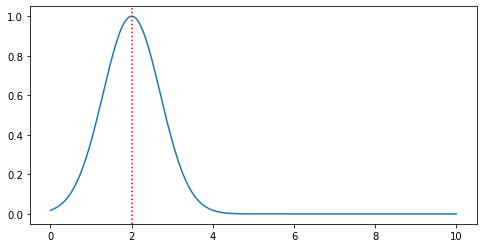

In [7]:
Ind = 100 #(change me) 
 
print('Considered point:')
print(Grid[Ind]) # Grid[Ind] is our x'

# For simplicity, we just use the corresponding column of MatKgrid
# i.e. we take advantage from the fact that we already have computed 
# the kernel on our grid
width = 8
height = 4
plt.figure(figsize=(width, height))

plt.plot(Grid, MatK_Grid[:,Ind])
plt.axvline(x=Grid[Ind],color='r',linestyle='dotted')
plt.show()

We can now simulate. 

In [8]:
# Simulation of one realisation of a centred Gaussian random vector 
# with covariance matrix MatK_Grid
mu_vec = np.repeat(0,nPt, axis=0)

# To freeze the randomness, we may use a seed
np.random.seed(33)
Z_vec = np.random.multivariate_normal(mean=mu_vec, cov=MatK_Grid)

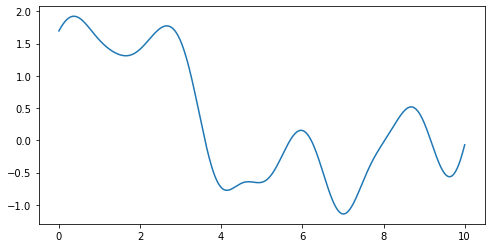

In [9]:
width = 8
height = 4
plt.figure(figsize=(width, height))

plt.plot(Grid, Z_vec)
plt.show()

In [10]:
# To generate several realisations at the same time
nb_of_real = 5

Z_vec_multi = np.random.multivariate_normal(mean=mu_vec, 
                                            cov=MatK_Grid, size=nb_of_real).T

print(Z_vec_multi)

[[ 0.46299301 -1.04806211 -1.81348798 -0.49660694 -0.03560251]
 [ 0.43891772 -1.05442547 -1.74998804 -0.49282262 -0.02397038]
 [ 0.414809   -1.05883734 -1.68282412 -0.48884345 -0.01306499]
 ...
 [-0.29880912 -1.21335657  1.86809435  0.11664949  0.73873567]
 [-0.31034907 -1.20261159  1.8999144   0.08804028  0.75342217]
 [-0.32103242 -1.19051276  1.92815875  0.06023858  0.76696168]]


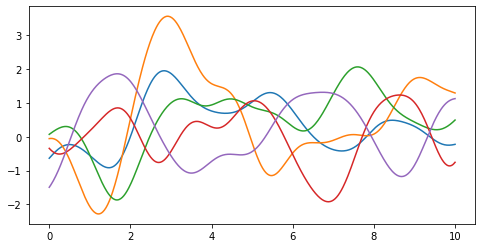

In [9]:
width = 8
height = 4
plt.figure(figsize=(width, height))


plt.plot(Grid,Z_vec_multi[:,0])
plt.plot(Grid,Z_vec_multi[:,1])
plt.plot(Grid,Z_vec_multi[:,2])
plt.plot(Grid,Z_vec_multi[:,3])
plt.plot(Grid,Z_vec_multi[:,4])
plt.show()

We now select $n\in\mathbb{N}$ sample locations on our grid (with $n<M$), and we use our first realisation `Z_vec` to generate our data (reponse vector). 

***Remark:*** Actually, we could use some sample locations outside of the grid (and consider any response vector), but "staying on the grid" is very convenient: all the necessary information is then indeed already be in `MatK_Grid` (this is further explained below).  

In [10]:
# Indices of the sample locations
Ind_of_samp = [21, 34,  78, 154, 247, 332, 476]
nn = len(Ind_of_samp)

Samp_Loc = Grid[Ind_of_samp]
Resp_Vec = Z_vec[Ind_of_samp]

In [11]:
# Remark: to select the indices of the sample locations randomly, 
# we may proceed as follow:

# np.random.choice(nPt, size=nn, replace=False)

In [12]:
print('Sample locations:')
print(Samp_Loc)

print('Response vector:')
print(Resp_Vec)

Sample locations:
[0.42 0.68 1.56 3.08 4.94 6.64 9.52]
Response vector:
[ 1.92689174  1.59766114 -1.07197744  2.32529246 -0.63312408 -0.1165651
 -0.06196637]


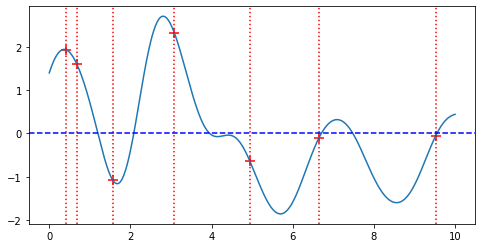

In [13]:
width = 8
height = 4
plt.figure(figsize=(width, height))

plt.plot(Grid, Z_vec)
plt.scatter(Grid[Ind_of_samp], Resp_Vec,
        marker="+", color='r', s=100)
for i in range(nn):
    plt.axvline(x=Samp_Loc[i], color='r', linestyle='dotted')

plt.axhline(y=0, color='b', linestyle='dashed')    

plt.show()

This is actualy how our raw data look like (i.e. we only have access to the sample locations and to the responses at those locations): 

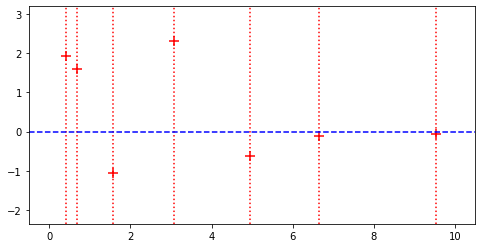

In [14]:
width = 8
height = 4
plt.figure(figsize=(width, height))

plt.ylim(min(Z_vec)-0.5, max(Z_vec)+0.5)
plt.xlim(-0.5, 10.5)

for i in range(nn):
    plt.axvline(x=Samp_Loc[i], color='r', linestyle='dotted')

plt.axhline(y=0, color='b', linestyle='dashed')    

plt.scatter(Samp_Loc, Resp_Vec,
        marker="+", color='r',s=100)

plt.show()

We now build our optimal prediction, that is the the function $x\mapsto \mathbb{E}(Z_{x}|\mathbf{z}=z)$. More precisely, we compute $\mathbb{E}(Z_{x}|\mathbf{z}=z)$ for all the points $x$ in our grid on $[0,10]$. 

In [15]:
MatK = MatK_Grid[np.ix_(Ind_of_samp, Ind_of_samp)]

MatCross = MatK_Grid[:,Ind_of_samp]

MatK_inv = np.linalg.inv(MatK) 

Pred_on_Grid = MatCross  @ (MatK_inv @ Resp_Vec)

***Important:*** The $n\times n$ matrix `MatK` is the kernel matrix defined by the kernel $K$ and the sample locations $\{x_{1},\cdots,x_{n}\}$. Also, `MatCross` is the $M\times n$ matrix with $i,j$ entry $K(g_{i},x_{j})$, where $\{g_{1},\cdots,g_{M}\}$ are the $M$ points of our grid on $[0,10]$ (i.e. the locations where we want to do the prediction); with the notations of the lecture notes, we can notice that the $i$-th row of `MatCross` is $\mathbf{k}^{T}(g_{i})$.  

As a remark, since in this example the sample locations consist of a subset of the grid points `Grid`, we were able to directly extract the matrices `MatK` and `MatCross` from the $M\times M$ matrix `MatK_Grid`. In the general case, `MatK` and `MatCross` need to be "built from scratch", i.e. by using the kernel function and the set of points `Samp_Loc` and `Grid` (see the Volcano experiment). 

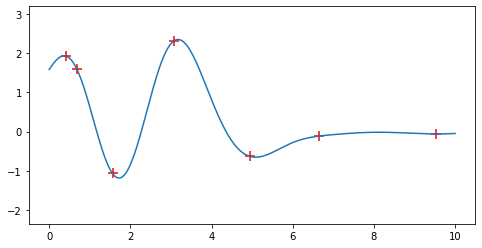

In [16]:
width = 8
height = 4
plt.figure(figsize=(width, height))

plt.ylim(min(Z_vec)-0.5, max(Z_vec)+0.5)
plt.xlim(-0.5, 10.5)

plt.plot(Grid, Pred_on_Grid)
plt.scatter(Samp_Loc, Resp_Vec,
        marker="+", color='r',s=100)

plt.show()

We now generate some realisations of the conditional process. Again, we restrict the simulation to our grid on $[0,10]$. 

We first compute the kernel matrix defined from the conditional covariance kernel and the grid. For clarity, we denote by 
$$
\text{c-cov}(Z_{x},Z_{x'}\;|\mathbf{z}=\boldsymbol{z})=
C(x,x')=K(x,x')-\mathbf{k}^{T}(x)\mathbf{K}^{-1}\mathbf{k}(x')
$$
the conditional covariance kernel corrsponding to our example. 

In [17]:
Cond_Cov_Mat = MatK_Grid - MatCross @ MatK_inv @  MatCross.T

We can now simulate a centered Gaussian process with covariance kernel $C$. 

In [18]:
nb_of_real = 5

Z_vec_multi_C = np.random.multivariate_normal(mean=mu_vec, 
                                              cov=Cond_Cov_Mat, size=nb_of_real).T

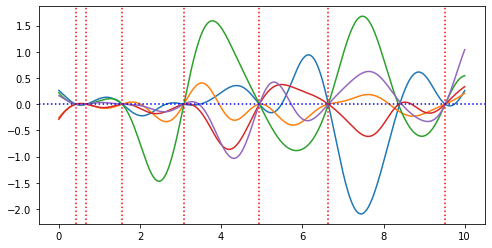

In [19]:
width = 8
height = 4
plt.figure(figsize=(width, height))


plt.plot(Grid, Z_vec_multi_C[:,0])
plt.plot(Grid, Z_vec_multi_C[:,1])
plt.plot(Grid, Z_vec_multi_C[:,2])
plt.plot(Grid, Z_vec_multi_C[:,3])
plt.plot(Grid, Z_vec_multi_C[:,4])

for i in range(nn):
    plt.axvline(x=Samp_Loc[i], color='r', linestyle='dotted')
    
plt.axhline(y=0, color='b', linestyle='dotted')    

plt.show()

By additing such realisations to our optimal prediction, we obtain some realisations of the conditional process. 

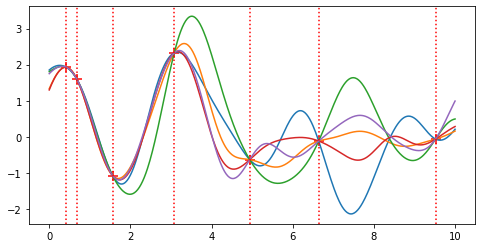

In [20]:
width = 8
height = 4
plt.figure(figsize=(width, height))


plt.plot(Grid, Z_vec_multi_C[:,0] + Pred_on_Grid)
plt.plot(Grid, Z_vec_multi_C[:,1] + Pred_on_Grid)
plt.plot(Grid, Z_vec_multi_C[:,2] + Pred_on_Grid)
plt.plot(Grid, Z_vec_multi_C[:,3] + Pred_on_Grid)
plt.plot(Grid, Z_vec_multi_C[:,4] + Pred_on_Grid)

for i in range(nn):
    plt.axvline(x=Samp_Loc[i], color='r', linestyle='dotted')

plt.scatter(Samp_Loc, Resp_Vec,
        marker="+", color='r',s=100)

plt.show()

We in particular have $\mathrm{var}(Z_{x}|\mathbf{z}=\boldsymbol{z})=C(x,x)$. Hereafter, we plot the function $x\mapsto \sqrt{C(x,x)}$. 

***Important:*** From a theoretical standpoint, we always have $C(x,x)\geqslant 0$; however, due to numerical errors, in practice and when performing the numerical computation, we might obtain a very small negative value instead of a true theoretical $0$ (e.g. `-1e-15`). To prevent this to cause issue when computing the square root, we may use $\max(0,C(x,x))$ or $|C(x,x)|$ instead of $C(x,x)$ in our code. 

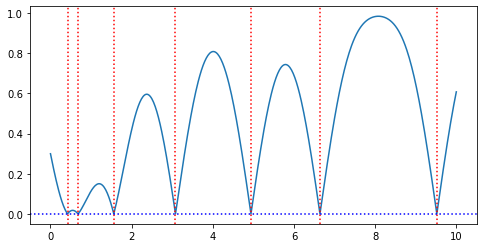

In [21]:
width = 8
height = 4
plt.figure(figsize=(width, height))


plt.plot(Grid, np.diag(np.sqrt(np.maximum(0, Cond_Cov_Mat))))

for i in range(nn):
    plt.axvline(x=Samp_Loc[i], color='r', linestyle='dotted')

plt.axhline(y=0, color='b', linestyle='dotted')    
    
plt.show()

We now have all the materials to construct the 95%-confidence region related to our kernel regression model.  

## 1.2 Maximum likelihood

In [22]:
# Observations
print('Sample locations:')
print(Samp_Loc)
print('Response vector:')
print(Resp_Vec)

Sample locations:
[0.42 0.68 1.56 3.08 4.94 6.64 9.52]
Response vector:
[ 1.92689174  1.59766114 -1.07197744  2.32529246 -0.63312408 -0.1165651
 -0.06196637]


Assuming that the covariance kernel is Gaussian (but that the kernel parameter $\rho$ is unknown), for $\rho>0$, we can compute the likelihood of $\rho$ given the observations, i.e. we can compute $\mathcal{L}(\rho|\mathbf{z}=\boldsymbol{z})$. 

In [23]:
MatK_rho = np.zeros((nn, nn))

In [24]:
rho = 2

for i in range(nn):
    for j in range(i+1):
        MatK_rho[i,j] = np.exp(-rho * (Samp_Loc[i]-Samp_Loc[j])**2 )
        MatK_rho[j,i] = MatK_rho[i,j]
    
MatK_rho_inv = np.linalg.inv(MatK_rho) 
    
T1 = 1/np.sqrt( np.linalg.det(2 * np.pi * MatK_rho) )
T2 = np.exp(- Resp_Vec.T @ (MatK_rho_inv @ Resp_Vec)/2 ) 
    
    
Like = T1 * T2

print(Like)

1.3339856316754475e-05


We could then plot the map $\rho\mapsto\mathcal{L}(\rho|\mathbf{z}=\boldsymbol{z})$, and compute (approximately) where it reaches its maximum. We may for instance plot this function for $\rho\in(0,6]$; obviously, we need to discretise the interval considered (in Machine Learning and Optimisation, such a discretisation-based approach to approximately find the extremum of a function is referred to as *grid search*). 

***Important:*** Notice that for $\rho=0$, the kernel matrix $\mathbf{K}_{\rho}$ is not invertible; so, in our discretisation, we should not consider "too-small values of $\rho$". 

***Remark:*** For a given set of sample locations $\{x_{1},\cdots,x_{n}\}$, we can actually easily generate response vectors corresponding to realisations of the random vector $\mathbf{z}\sim\mathcal{N}_{n}(0,\mathbf{K})$. Notice that $\mathbf{K}$ is the kernel matrix defined by our initial kernel (i.e. here, the Gaussian kernel with $\rho=1$) and the set of sample locations $\{x_{1},\cdots,x_{n}\}$. 

In [25]:
NewRespVec = np.random.multivariate_normal(mean=np.zeros(nn), cov=MatK)

print(NewRespVec)

[-0.82241577 -0.98067936  0.2968619  -0.10859233  0.24561686  0.6739493
 -0.34411354]


For a fixed set of sample locations and fixed initial kernel (e.g. Gaussian with $\rho=1$), we could then generate an obsevation vector $\boldsymbol{z}$ and compute the corresponding ML estimation of the covariance-kernel parameter. By repeating this experiment several times (i.e. by generating several realisations $\boldsymbol{z}$ and next computing the corresponding ML estimations of the covariance-kernel parameter), we could plot an histogram of the values obtained for the ML estimator of the covariance-kernel parameter. We would in this way obtain an approximation of the *distribution of the ML estimator*.   

We could also add an amplitude parameter $\alpha>0$ in front of our kernel $K$ (which already depends on $\rho$), i.e. instead of $K$, we may consider the kernel $\alpha K$ (depending on $\rho$ and $\alpha$). For a given set of sample locations $\{x_{1},\cdots,x_{n}\}$ and a given response vector $\boldsymbol{z}$, we could then simultaneously estimate $\alpha$ and $\rho$ by likelihood maximisation, i.e. by searching, via grid search, the maximum of the bivariate function 
$$
(\alpha,\rho)\mapsto\mathcal{L}(\alpha,\rho|\mathbf{z}=\boldsymbol{z}).
$$

## 2.  Two-dimensional example

In the cells below, we illustrate how to generate and represent a realisation of a centered GP on $[0,1]^{2}$. 

In [26]:
from mpl_toolkits import mplot3d

In [27]:
# Square grid on [0,10]^2
nX1 = 31 ; nX2 = 31 ; nPt = nX1 * nX2
X1 = np.linspace(0, 10, nX1)
X2 = np.linspace(0, 10, nX2)

# Create the grid and store it as a matrix
Grid = np.array(np.meshgrid(X1,X2)).reshape(2,nX1*nX2).T 

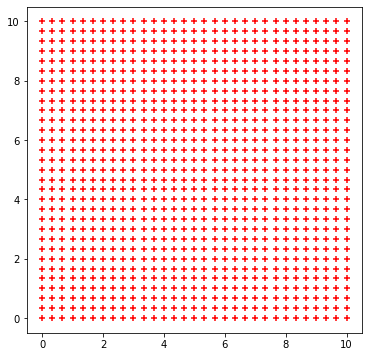

In [28]:
width = 6
height = 6
plt.figure(figsize=(width, height))


plt.scatter(Grid[:, 0], Grid[:, 1], 
            marker="+", color='r', s=40)
plt.show()

Here is a way to encode a Gaussian kernel on $\mathbb{R}^{2}\times\mathbb{R}^{2}$. 

In [29]:
rho_param = 0.3

def Gauss_Kernel(x,y):
    sq_dist = sum((x-y)**2) # squared Euclidean distance 
    return np.exp(-rho_param * sq_dist)

In [30]:
MatK_Grid = np.zeros((nPt, nPt))

for i in range(nPt):
    for j in range(nPt):
        MatK_Grid[i,j] = Gauss_Kernel(Grid[i,:], Grid[j,:])
            
    
# Fast way to build a kernel matrix with Gaussian kernel
# in R or Python (without for loop)
#AllIP = Grid @ Grid.T
#AllSqN = np.diag(AllIP)
#AllSqDist = np.add.outer(AllSqN, AllSqN) - 2 * AllIP
#MatK_Grid = np.exp(-k_param * AllSqDist)

In [31]:
# Simulation of one realisation of a centred Gaussian random vector 
# with covariance kernel MatKgrid
mu_vec = np.repeat(0, nPt, axis=0)

#np.random.seed(123)
Z_vec = np.random.multivariate_normal(mean=mu_vec, cov=MatK_Grid)

In [32]:
# We need to trun Z_vec into a matrix for 3d-plot 
Z_vec_In_Mat = Z_vec.reshape(nX1, nX2)

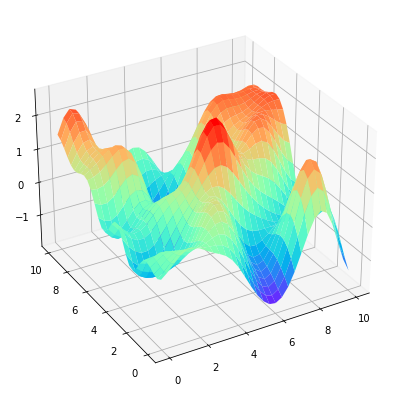

In [33]:
width = 7
height = 7

x, y = np.meshgrid(X1, X2)
plt.figure(figsize=(width, height))

ax = plt.axes(projection='3d')
#ax.plot_wireframe(x, y, Z_vec_In_Mat, rstride=1, cstride=1)
ax.plot_surface(x, y, Z_vec_In_Mat, rstride=1, cstride=1,
                cmap='rainbow', edgecolor='none')


elev = 30
azim = -120
ax.view_init(elev, azim)

plt.show()

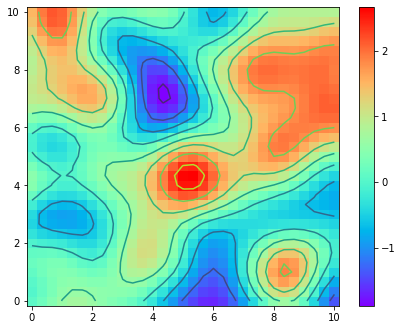

In [34]:
width = 7
height = 5.5
plt.figure(figsize=(width, height))

plt.pcolor(x, y, Z_vec_In_Mat, cmap='rainbow', shading='auto')
plt.colorbar()

plt.contour(x, y, Z_vec_In_Mat)
plt.show()

## 3. Volcano dataset

The following cell loads the `DataVolcano50` dataset. Notice that the path to the dataset assume that the file is in the same folder as the notebook. 

In [35]:
Volcano50 = np.genfromtxt('DataVolcano50.txt',delimiter=',',dtype=float)
Volcano50 = np.delete(Volcano50, (0), axis=0) # Remove the header row
print(Volcano50)

[[ 0.96428571  0.         -1.186456  ]
 [ 0.17857143  0.05       -0.44749151]
 [ 0.39285714  0.05       -0.60306298]
 [ 0.82142857  0.05       -0.36970577]
 [ 0.60714286  0.1        -0.3308129 ]
 [ 0.78571429  0.1        -0.25302716]
 [ 0.85714286  0.1        -0.64195585]
 [ 0.07142857  0.15       -0.95309879]
 [ 0.03571429  0.2        -0.99199166]
 [ 0.32142857  0.2         0.83597314]
 [ 0.          0.25       -1.0697774 ]
 [ 0.75        0.25        0.71929454]
 [ 0.28571429  0.3         1.76940198]
 [ 0.92857143  0.3        -1.0697774 ]
 [ 1.          0.3        -1.14756313]
 [ 0.03571429  0.35       -0.87531305]
 [ 0.10714286  0.35        0.25258012]
 [ 0.35714286  0.35        1.73050911]
 [ 0.5         0.35        1.14711609]
 [ 0.92857143  0.35       -1.03088453]
 [ 0.39285714  0.4         1.84718771]
 [ 0.71428571  0.4         0.79708027]
 [ 0.85714286  0.4        -0.09745569]
 [ 0.25        0.45        2.31390213]
 [ 0.57142857  0.45        1.57493764]
 [ 0.96428571  0.45      

### Indications to perform kernel regression on the `Volcano50` dataset. 

The dataset consists of the coordinates of $n=50$ sample locations $\{x_{1},\cdots,x_{n}\}\subset[0,1]^2$, and the corresponding responses at the sample locations. The first two columns of the dataset are the coordinates of the sample locations, and the last column is the response vector denoted by $\boldsymbol{z}\in\mathbb{R}^{n}$ in the lecture notes. 


* ***Task 1:*** *Create a $n\times 2$ matrix (or array) `Samp_Loc` to store to the coordinates of the sample locations; `Samp_Loc` corresponds to the first two columns of `Volcano50`. Also, create a vector `Resp_Vec` (i.e. a $n\times 1$ matrix or array) corresponding to the last column of `Volcano50`; notice that `Resp_Vec` is the response vector mathematically denoted by $\boldsymbol{z}$.* 

    
We then define a set of $M$ grid points $\{g_{1},\cdots,g_{M}\}\subset[0,1]^2$. We want to predict the "shape of the volcano" at all the grid points from the observations (i.e. from the dataset). 


    
* ***Task 2:*** *Create the grid points and store their coordinates in a $M\times 2$ matrix `Grid`. Notice that the notebook contains an example of the commands you can use to generate the grid.*   


We then choose a kernel $K$; we may for instance consider a Gaussian kernel with $\rho=35$. From the lecture notes we know that the optimal prediction $p_{l}$ at the grid point $g_{l}$, with $l\in\{1,\cdots,M\}$, is given by 
$$
p_{l}=\mathbf{k}^{T}(g_{l})\mathbf{K}^{-1}\boldsymbol{z}, 
$$
with $\mathbf{k}(g_{l})=\big(K(x_{1},g_{l}),\cdots,K(x_{n},g_{l})\big)^{T}$, and where $\mathbf{K}$ is the $n\times n$ kernel matrix defined by the kernel $K$ and the sample locations; in other words, the $i,j$ entry of $\mathbf{K}$ is $K(x_{i},x_{j})$, with $i$ and $j\in\{1,\cdots,n\}$. In the code, we denote by `MatK` the matrix $\mathbf{K}$. 


* ***Task 3:*** *Use the kernel function and `Samp_Loc` to build the matrix `MatK` with $i,j$ entry $K(x_{i},x_{j})$, for $i$ and $j\in\{1,\cdots,n\}$ (use the kernel function and for loops to populate the matrix). Compute the inverse of `MatK` and call it `MatK_inv`.* 

We now need to compute the $1\times n$ row vectors $\mathbf{k}^{T}(g_{l})$ for all $l\in\{1,\cdots,M\}$, i.e. for all the grid points. We can for instance decide to compute these $M$ vectors at once, and store them in a $M\times n$ matrix $\mathbf{C}$, referred to as `MatCross` in the code (we may notice that `MatCross` corresponds to a cross-covariance matrix, explaining its name). 

* ***Task 4:*** *Use the kernel function, `Grid` and `Samp_Loc` to build the matrix `MatCross`, with $i,j$ entry $K(g_{i},x_{j})$, for $i\in\{1,\cdots,M\}$ and $j\in\{1,\cdots,n\}$ (use the kernel function and for loops to populate the matrix).* 


We then define a vector $\boldsymbol{p}=(p_{1},\cdots,p_{M})^{T}\in\mathbb{R}^{M}$ (i.e. a $M\times 1$ matrix or array) to store the prediction $p_{l}$ at all the grid points $g_{l}$, with $l\in\{1,\cdots,M\}$. In the code, we refer to $\boldsymbol{p}$ as `Pred_on_Grid`, the vector of the predictions at all the grid points. Using the previous mathematical notations, we have
$$
\boldsymbol{p} = \mathbf{C} \mathbf{K}^{-1}\boldsymbol{z}. 
$$

* ***Task 5:*** *Compute the vector `Pred_on_Grid`.* 

We have now obtained a prediction for all the grid points, and we can plot this prediction to visualise the predicted shape of the volcano. Notice that the notebook already contains an example of the commands you can use to plot the predicted surface of the volcano.  
  
***Important:*** In this example, our sample location and the grid where we want to do the prediction are two distinct set (i.e. the set of our sample locations is not a subset of our prediction grid, so that we need to compute `MatK` and `MatCross` separatly).   

***Remark:*** Below, you can find an example on how to extract `Samp_Loc` and `Resp_Vec` from `Volcano50`.  

In [52]:
#Task 1

Resp_Vec = Volcano50[:,2]
Samp_Loc = Volcano50[:,0:2]
print(Samp_Loc)

[[0.96428571 0.        ]
 [0.17857143 0.05      ]
 [0.39285714 0.05      ]
 [0.82142857 0.05      ]
 [0.60714286 0.1       ]
 [0.78571429 0.1       ]
 [0.85714286 0.1       ]
 [0.07142857 0.15      ]
 [0.03571429 0.2       ]
 [0.32142857 0.2       ]
 [0.         0.25      ]
 [0.75       0.25      ]
 [0.28571429 0.3       ]
 [0.92857143 0.3       ]
 [1.         0.3       ]
 [0.03571429 0.35      ]
 [0.10714286 0.35      ]
 [0.35714286 0.35      ]
 [0.5        0.35      ]
 [0.92857143 0.35      ]
 [0.39285714 0.4       ]
 [0.71428571 0.4       ]
 [0.85714286 0.4       ]
 [0.25       0.45      ]
 [0.57142857 0.45      ]
 [0.96428571 0.45      ]
 [0.28571429 0.5       ]
 [0.35714286 0.55      ]
 [0.71428571 0.55      ]
 [0.42857143 0.6       ]
 [0.28571429 0.65      ]
 [0.57142857 0.65      ]
 [0.67857143 0.65      ]
 [0.14285714 0.7       ]
 [0.57142857 0.7       ]
 [0.89285714 0.7       ]
 [1.         0.7       ]
 [0.75       0.75      ]
 [0.92857143 0.75      ]
 [0.39285714 0.8       ]


In [47]:
#Task 2

# Square grid on [0,1]^2
M1 = 40 ; M2 = 40 ; nPt = M1 * M2
X1 = np.linspace(0, 1, M1)
X2 = np.linspace(0, 1, M2)

# Create the grid and store it as a matrix
Grid = np.array(np.meshgrid(X1,X2)).reshape(2,nPt).T 
print(Grid)

[[0.         0.        ]
 [0.02564103 0.        ]
 [0.05128205 0.        ]
 ...
 [0.94871795 1.        ]
 [0.97435897 1.        ]
 [1.         1.        ]]


In [48]:
#Now we will define our kernel function 
rho_param = 0.35

def Gauss_Kernel(x,y):
    sq_dist = sum((x-y)**2) # squared Euclidean distance 
    return np.exp(-rho_param * sq_dist)

In [56]:
#Task 3 
n=50
MatK_Grid = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        MatK_Grid[i,j] = Gauss_Kernel(Samp_Loc[i], Samp_Loc[j])
        
# Compute the inverse of MatK
MatK_inv = np.linalg.inv(MatK)


In [58]:
# Task 4
M = 40
MatCross = np.zeros((M, n))

for i in range(M):
    for j in range(n):
        MatCross[i,j] = Gauss_Kernel(Grid[i], Samp_Loc[j])
        
        


[[0.72220487 0.98803643 0.94658656 ... 0.55694671 0.66806153 0.69686699]
 [0.7346443  0.99098023 0.95306546 ... 0.56617664 0.67392884 0.69894327]
 [0.74695414 0.99347547 0.95914718 ... 0.57529471 0.67953487 0.70070318]
 ...
 [0.99991518 0.81182622 0.89671389 ... 0.75303614 0.67953487 0.57258506]
 [0.99996449 0.80049721 0.88760759 ... 0.75259069 0.67392884 0.56459465]
 [0.99955367 0.78896311 0.87818952 ... 0.75179942 0.66806153 0.5564596 ]]


In [45]:
width = 5
height = 5
plt.figure(figsize=(width, height))

# Grid points for prediction on [0,1]^2
#plt.scatter(Grid[:, 0], Grid[:, 1], 
#            marker="+", color='r', s=20)

plt.scatter(Samp_Loc[:, 0], Samp_Loc[:, 1], 
            marker="o", color='b', s=20)
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 360x360 with 0 Axes>